In [5]:
from scipy.linalg import eigh_tridiagonal
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

np.set_printoptions(precision=3, suppress=True)

In [6]:
V0, kl = -10, np.pi

x = np.linspace(0, 1, 1001)
V = V0 * np.sin(np.pi * x) ** 2

In [7]:
l_max = 60
l = np.arange(-l_max, l_max+1)

q = np.linspace(-5 * np.pi, 5 * np.pi, 200)
E = np.empty((len(q), len(l)), dtype = np.complex128)

In [8]:
for i, k in enumerate(q):
    E[i], _ = eigh_tridiagonal( (2 * l + k/kl) ** 2 + V0/2, -V0/4 * np.ones(len(l) - 1))

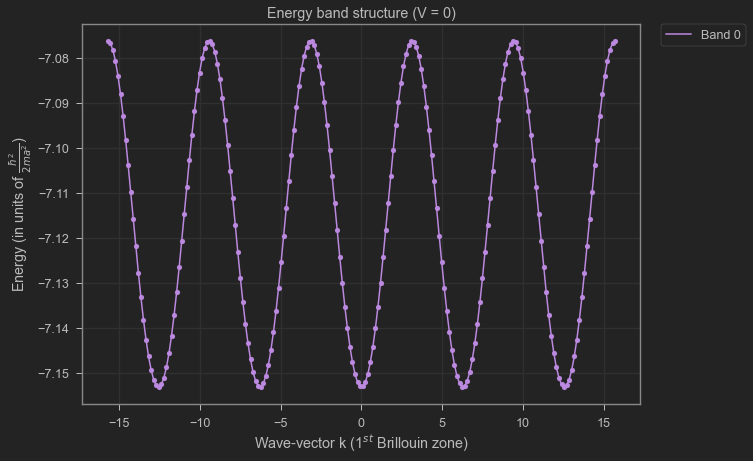

In [9]:
fig = plt.figure(figsize=(10, 7))

for i in range(1):
    plt.plot(q, np.real(E)[:, i], c = f"C{10+i}", zorder = 5, label = f"Band {i}")
    plt.scatter(q, np.real(E)[:, i], c = f"C{10+i}", zorder = 5, s = 25)


ax = plt.gca()
ax.set_xlabel(r"Wave-vector k (1$^{st}$ Brillouin zone)")
ax.set_ylabel(r"Energy (in units of $\frac{\hbar^2}{2ma^2}$)")
ax.set_title("Energy band structure (V = 0)")

ax.legend(bbox_to_anchor=(1.025, 1.015))

In [10]:
q = 0
E, phi = eigh_tridiagonal( (2 * l + q/kl) ** 2 + V0/2, -V0/4 * np.ones(len(l) - 1))

In [11]:
def to_pos_basis(phi_l, kl, l, x):
    def phi_x(x):
        return (1/np.sqrt(2*np.pi)) * np.sum(phi_l * np.exp(2j * kl * x * l))
    
    return [phi_x(xi) for xi in x]

In [12]:
psi = [to_pos_basis(phi_i, kl, l, x) for phi_i in phi.T]

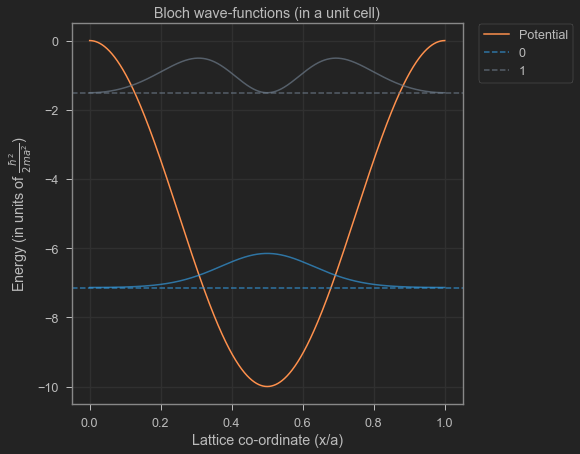

In [13]:
fig = plt.figure(figsize = (7, 7))
plt.plot(x, V, c = "C4", label = "Potential")

for i in range(np.argmax(E > 0)):
    prob = np.abs(psi[i])**2
    plt.plot(x, E[i] + 0.1 * np.max(-V)/np.max(prob) * prob, c = f"C{i + 12}", alpha = 0.7)
    plt.axhline(E[i], c = f"C{i + 12}", ls = "dashed", alpha = 0.7, label = f"{i}")

plt.legend(bbox_to_anchor=(1.025, 1.015))
plt.title("Bloch wave-functions (in a unit cell)")
plt.xlabel("Lattice co-ordinate (x/a)")
plt.ylabel(r"Energy (in units of $\frac{\hbar^2}{2ma^2}$)");